# Введение в машинное обучение

# Практическое задание 2


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**1.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [5]:
import pandas as pd
pd.set_option('display.max_columns', 100) #колонки иначе не отображаются полностью
import missingno
import seaborn as sns 
%pylab inline

flights = pd.read_csv('flights.csv')
print(flights.shape)
flights.head()

Populating the interactive namespace from numpy and matplotlib
(70000, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
if flights["DepDelay"].isnull().any() == True: 
    print("В данных имеются пропущенные значения")
else: 
    print("В данных нет пропущенных значений")

В данных имеются пропущенные значения


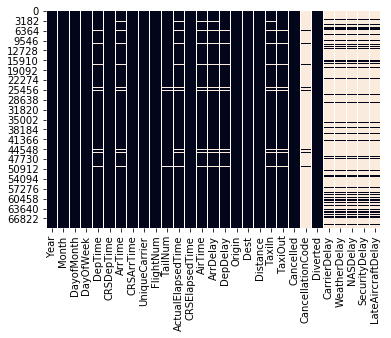

In [7]:
#Визуализируем пропуски с помощью билиотеки seaborn (красивее можно было бы с missingno, но там нет цифр!) ~ поймем, в каких 
#переменных много пропущенных значений и, следовательно, какие можно 
#удалить 
sns.heatmap(flights.isnull(), cbar=False); 

Как видно из графика, много пропусков в переменных`` CancellationCode``, ``LateAircraftDelay``, а также переменных, связанных с целевой переменной (``CarrierDelay``, ``WeatherDelay`` и etc). 

In [8]:
#Дополнительно выведем количество пропушенных значений в переменных
flights.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

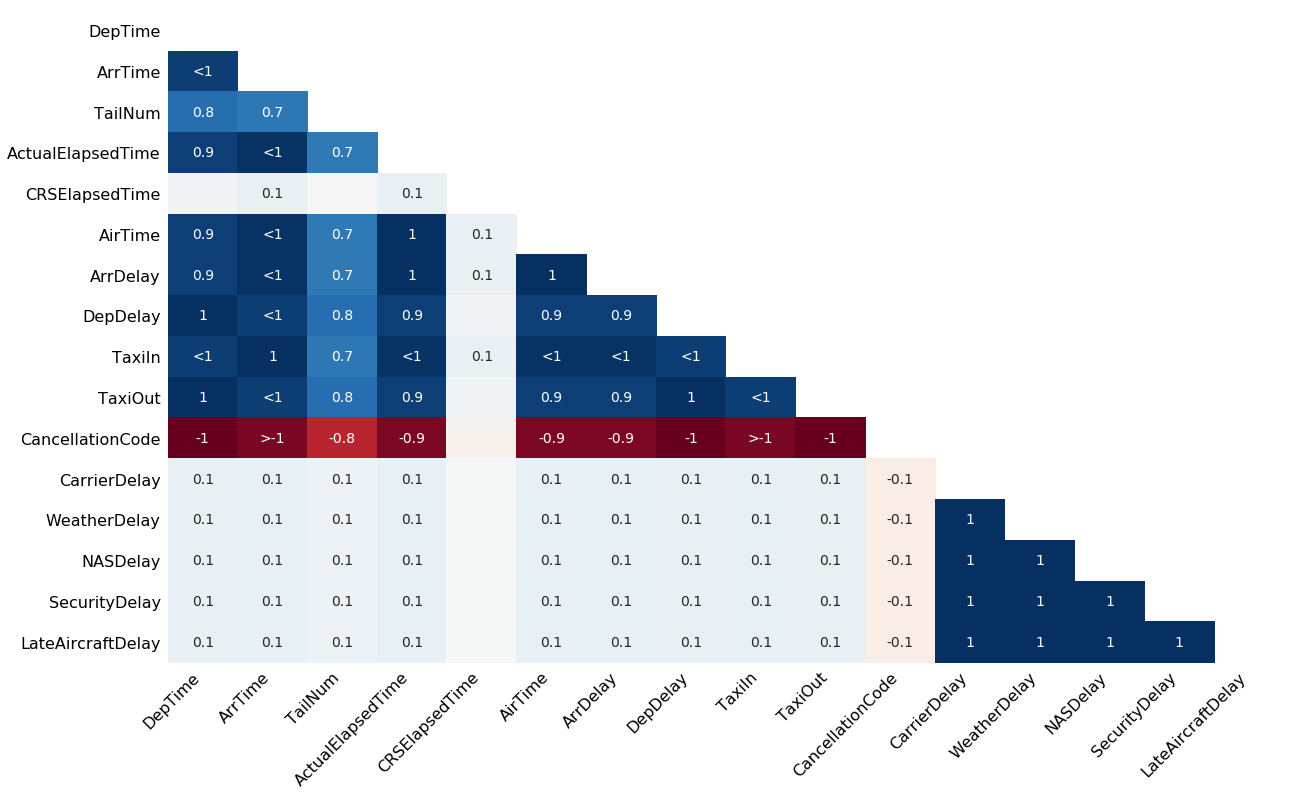

In [9]:
#Выведем корреляционну матрицу нахождения пропущенных значений по колонкам (это в т.ч. полезно для последующих заданий)
missingno.heatmap(flights); 

In [10]:
print("Всего в датасете {} пропущенных значений".format(flights.isnull().sum().sum()))
print("Количество объектов хотя бы с одним пропуском:", flights.isnull().any(axis = 1).sum())
print("Количество признаков хотя бы с одним пропуском:", flights.isnull().any(axis = 0).sum())
print("-----------------------------------------------------")
if flights.DepDelay.isnull().any() == True: 
    print("В целевой переменной имеются пропущенные значения")
    print("Целевая переменная содержит {} пропущенных значений".format(flights.DepDelay.isnull().sum()))
    print("Доля пропущенных значений в целевой переменной: ", round(flights.DepDelay.isnull().sum()/flights.shape[0], 2))
else: 
    print("В целевой переменной отсутствуют пропущенные значения")

Всего в датасете 355215 пропущенных значений
Количество объектов хотя бы с одним пропуском: 70000
Количество признаков хотя бы с одним пропуском: 16
-----------------------------------------------------
В целевой переменной имеются пропущенные значения
Целевая переменная содержит 1399 пропущенных значений
Доля пропущенных значений в целевой переменной:  0.02


Проанализируем объекты с пропущенными значениями целевой переменной

In [11]:
#Рассмотрим описательные статистики для других переменных, когда DepDelay = 0. 
#Метод count посчитывает только не пропущенные значения.
flights_missing = flights[flights.DepDelay.isnull()]
flights_missing.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1399.0,1399.000000,1399.000000,1399.000000,0.0,1399.000000,0.0,1399.000000,1399.000000,0.0,1395.000000,0.0,0.0,0.0,1399.000000,0.0,0.0,1399.0,1399.0,0.0,0.0,0.0,0.0,0.0
mean,2008.0,5.646891,15.562545,3.987848,NaN,1379.989993,NaN,1543.809149,2789.937098,NaN,114.856631,NaN,NaN,NaN,585.818442,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
std,0.0,3.705114,8.585107,2.018653,NaN,462.847110,NaN,480.819451,2131.389377,NaN,57.635620,NaN,NaN,NaN,461.874840,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
min,2008.0,1.000000,1.000000,1.000000,NaN,50.000000,NaN,2.000000,5.000000,NaN,24.000000,NaN,NaN,NaN,31.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
25%,2008.0,2.000000,9.000000,2.000000,NaN,1000.000000,NaN,1145.000000,895.000000,NaN,75.000000,NaN,NaN,NaN,256.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
50%,2008.0,5.000000,15.000000,4.000000,NaN,1420.000000,NaN,1605.000000,2309.000000,NaN,100.000000,NaN,NaN,NaN,448.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
75%,2008.0,9.000000,22.000000,6.000000,NaN,1755.000000,NaN,1940.000000,4444.000000,NaN,141.000000,NaN,NaN,NaN,761.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
max,2008.0,12.000000,31.000000,7.000000,NaN,2359.000000,NaN,2359.000000,7794.000000,NaN,404.000000,NaN,NaN,NaN,2704.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


Из таблицы заметно, что: 
* Пропуски в целевой переменной соответствуют значению переменной ``Cancelled`` == 1,  значению переменной ``Diverted`` == 0. Это означает, что все рейсы, для которых не указано время задержки, были отменены. Предполагаем, что можно удалить эти переменные, а также связанную с ``Cancelled`` переменную ``CancellationCode``. 
* Так как рейсы были отменены, нет значения переменной ``DepTime``
* Отсутствуют связанные с задержкой рейса переменные: ``LateAircraftDelay``, ``SecurityDelay``, ``NASDelay``, ``WeatherDelay``, 
``CarrierDelay``

Признаки в последнем пункте на данном основании нельзя удалять, тк доля пропусков в целевой переменной невелика, и в этих переменных может содержаться ценная информация.  

In [12]:
#Проверим, сколько ненулевых значений отмененных и
#переадрисованных рейсов у ненулевых значений целевой переменной 
flights[flights.DepDelay.notnull()].Cancelled.value_counts()

0    68589
1       12
Name: Cancelled, dtype: int64

In [13]:
flights[flights.DepDelay.notnull()].Diverted.value_counts()
#Для всех ненулевых переменных переменных 171 переадресованный рейс, 
#может оказывать влияние на целевую переменную. пока не будем удалять. 

0    68430
1      171
Name: Diverted, dtype: int64

In [14]:
#Исключаем переменные
flights = flights[(-flights.DepDelay.isnull()) & (flights.DepDelay != 0)]
flights.drop(['Cancelled','CancellationCode'], axis=1, inplace = True)

In [15]:
Y = flights["DepDelay"]
X = flights.drop("DepDelay", axis = 1, inplace = True)
flights.shape

(63404, 26)

**2.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [16]:
#Есть два способа: разбить на 2 первые и две последние цифры, либо же 
#поделить. Чтобы решить, какой лучше, посмотрим на NA в переменных 
for i in ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]: 
    print(i, "---", flights[i].isnull().any())

DepTime --- False
CRSDepTime --- False
ArrTime --- True
CRSArrTime --- False


In [17]:
column_names = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for feature in column_names:
    flights[feature + "_Hour"], flights[feature + "_Minute"] = flights[feature]//100, flights[feature]%100
    flights.drop([feature], axis = 1, inplace = True)

**3.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [18]:
flights.drop(['TailNum','Year'], axis=1, inplace = True)
flights.shape

(63404, 28)

In [19]:
#Визуализируем корреляцию, для этого используем датафрейм до удаления 
#целевой переменной 
flights["DepDelay"] = Y
corr_coef = flights.corr(method = "pearson")
corr_coef

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,DepDelay
Month,1.000000,-0.004838,-0.010617,0.006598,-0.014230,-0.005765,-0.012840,-0.041950,-0.006289,0.007768,-0.014431,0.000721,-0.008286,0.017684,0.000651,0.008620,0.017445,-0.008803,0.002405,-0.006727,0.011477,-0.002887,-0.001491,0.002805,-0.005353,-0.029528
DayofMonth,-0.004838,1.000000,0.015818,0.009847,-0.008110,-0.007024,-0.007842,0.006479,-0.007196,-0.002673,-0.002481,0.002144,0.008789,0.002709,0.008594,-0.007752,0.009641,0.001605,0.006268,0.002206,-0.000784,-0.001435,-0.006125,0.000708,0.001285,0.008574
DayOfWeek,-0.010617,0.015818,1.000000,-0.005878,0.010330,0.013325,0.011541,0.002943,0.014755,0.001024,-0.005622,0.004786,0.015026,-0.012198,0.000053,0.005031,0.007566,0.005866,-0.000551,0.005484,-0.000623,0.005762,-0.000901,0.006235,0.000784,0.008530
FlightNum,0.006598,0.009847,-0.005878,1.000000,-0.324021,-0.331409,-0.336906,0.027777,-0.350380,-0.005973,0.002628,-0.003012,0.076525,0.060002,0.013833,0.009387,-0.022415,-0.003754,-0.006509,-0.011477,-0.002824,-0.019202,0.001697,-0.031454,0.018267,0.021166
ActualElapsedTime,-0.014230,-0.008110,0.010330,-0.324021,1.000000,0.979979,0.984401,0.089451,0.965089,0.154726,0.264840,NaN,-0.039599,-0.011799,0.183883,0.002250,-0.085353,-0.017290,0.000991,-0.016923,0.009981,0.033067,0.000021,0.052552,0.005242,0.041946
CRSElapsedTime,-0.005765,-0.007024,0.013325,-0.331409,0.979979,1.000000,0.988293,0.010358,0.983478,0.100990,0.140438,0.021977,-0.004071,-0.018638,0.043392,0.003952,-0.041558,-0.014587,0.001035,-0.011965,0.011929,0.034166,0.002003,0.058308,0.005302,0.034302
AirTime,-0.012840,-0.007842,0.011541,-0.336906,0.984401,0.988293,1.000000,0.031206,0.983222,0.082090,0.105578,NaN,-0.017756,-0.024191,0.061818,0.004590,-0.060884,-0.023179,0.001006,-0.020695,0.011579,0.026744,0.000545,0.045576,0.002669,0.025237
ArrDelay,-0.041950,0.006479,0.002943,0.027777,0.089451,0.010358,0.031206,1.000000,0.003952,0.117087,0.319716,NaN,0.501776,0.254704,0.370920,0.008990,0.509705,0.181565,-0.016460,0.119652,0.017466,0.062637,0.002412,0.115969,0.009064,0.933526
Distance,-0.006289,-0.007196,0.014755,-0.350380,0.965089,0.983478,0.983222,0.003952,1.000000,0.072517,0.090600,0.018590,-0.000119,-0.024372,0.014192,0.006950,-0.037445,-0.016906,-0.000497,-0.011925,0.015068,0.024635,0.002774,0.047643,0.005432,0.024252
TaxiIn,0.007768,-0.002673,0.001024,-0.005973,0.154726,0.100990,0.082090,0.117087,0.072517,1.000000,0.039556,-0.001945,-0.058748,0.004943,0.221044,0.000476,-0.046780,-0.046532,-0.001050,-0.052721,-0.013244,0.001059,-0.009682,-0.012198,-0.002818,0.020640


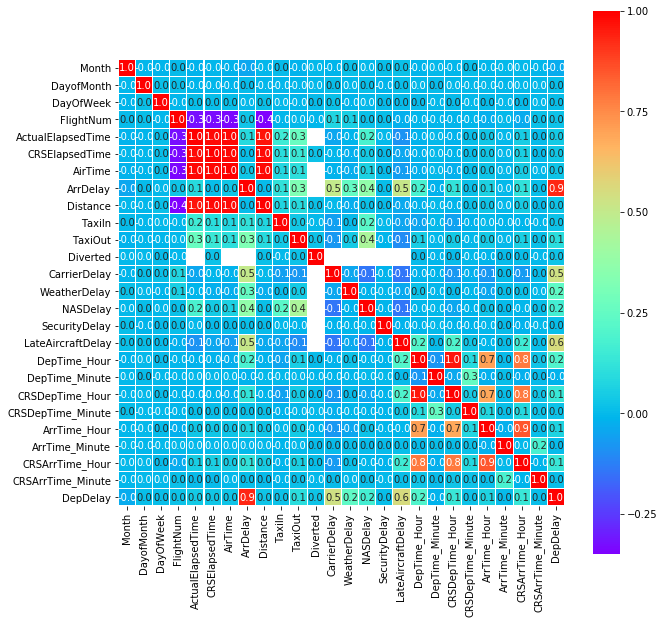

In [20]:
#Воспользуемся библиотекой seaborn для визуализации корреляции 
fig, ax = plt.subplots(figsize = (10, 10)) #рамка 
sns.heatmap(corr_coef, annot = True, fmt = ".01f", square = True, linewidths = 0.1, ax = ax, cmap = "rainbow"); 

In [21]:
for column in flights.columns: 
    try: 
        if abs(flights[column].corr(flights.DepDelay)) >  0.75:
            if column != "DepDelay": 
                print("Высокая корреляция между {} и целевой переменной: {}".format(column, flights[column].corr(flights.DepDelay)))
    except TypeError: 
        continue
print("Корреляция между целевой переменной и другими признаками низкая")

Высокая корреляция между ArrDelay и целевой переменной: 0.9335259384819432
Корреляция между целевой переменной и другими признаками низкая


Отметим, что ```SecurityDelay```, ``CarrierDelay``,`WeatherDelay`, `NASDelay`, `'LateAircraftDelay` по одиночке слабо коррелируют с целевой переменной, однако в сумме они сильно с ней коррелируют. Проверим это: создадим датафрейм с переменными `DepDelay` и перечисленными выше признаками, посчитаем корреляцию. 

In [22]:
corr_new = pd.DataFrame({"DepDelay": flights.DepDelay, 
                         "Delay": flights.SecurityDelay + flights.CarrierDelay + flights.WeatherDelay + flights.NASDelay + flights.LateAircraftDelay})
corr_coef2 = corr_new.corr(method = "pearson")
corr_coef2

,DepDelay,Delay
DepDelay,1.000000,0.932966
Delay,0.932966,1.000000


Нужно исключить признак `ArrDelay`, тк задержка вылеа сильно связана с задержкой прибытия, что может повлиять на решение. Также исключаем переменные, связанные со временем прибытия (вместе с временем отправления), так как они также составляют целевую переменную. 

In [23]:
flights.drop(["ArrDelay", 'NASDelay', 'SecurityDelay', \
              'CarrierDelay', 'WeatherDelay','LateAircraftDelay'], axis = 1, inplace = True)

In [24]:
flights.drop(["ArrTime_Hour", "ArrTime_Minute"], axis = 1, inplace = True)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**4.** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

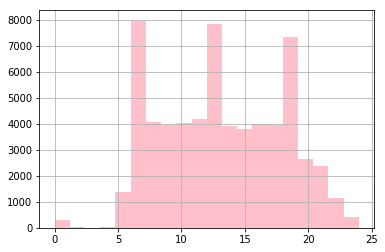

In [25]:
flights['DepTime_Hour'].hist(bins=20, color = "pink");

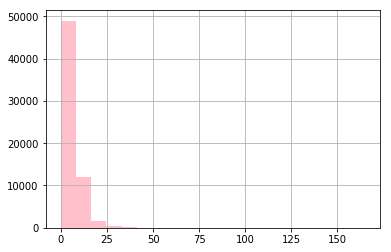

In [26]:
flights['TaxiIn'].hist(bins=20, color = "pink");

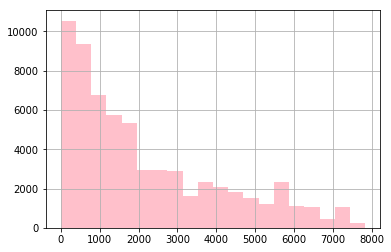

In [27]:
flights['FlightNum'].hist(bins=20, color = "pink");

Как видно из гистограмм, что у переменных разное распределение. Это связано с единицами измерения: `DepTime_Hour` измеряется в часах (от 0 до 24), `TaxiIn` -- в минутах (от 0 до 150), `FlightNum` является номером полета (от 0 до ~ 8000) => дисперсия среди признаков отличается. Следовательно, возникнет проблема подбора весов, так как он будет зависеть не только от значимости переменной, но и от абсолютного значения. Плюс проблема выбросов: могут привести к переобучению.  Масштабирование сделает среднее и разброс всех переменных одинаковым => все признаки будут вносить ~ одинаковый вклад, позволит получить более корректные оценки весов. 

**5.** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [31]:
def transform_data2(data):
    numeric = data.dtypes.eq('int64') | data.dtypes.eq('float')
    data_numeric = data.loc[:, numeric]
    data_numeric = data_numeric.fillna(value = 0)
    
    categorical = data.dtypes.eq('object') 
    data_categorical = data.loc[:, categorical]
    data_categorical = data_categorical.fillna(value = "nan")

    data_dummies = pd.get_dummies(data_categorical, dummy_na=True, drop_first=True)
    data_numeric = pd.DataFrame(StandardScaler().fit_transform(data_numeric),columns=data_numeric.columns,index = data_numeric.index)
    
    return data_numeric.join(data_dummies)

In [37]:
X = transform_data2(flights)

NameError: name 'StandardScaler' is not defined

In [33]:
print("число признаков после преобразования:",X.shape[1])

AttributeError: 'NoneType' object has no attribute 'shape'

**6.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [526]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
from sklearn.model_selection import train_test_split
#np.random.seed(40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

NameError: name 'y' is not defined

**7.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score

lr = LinearRegression()
x_train1000, y_train1000 = X_train[:1000], y_train[:1000]

NameError: name 'X_train' is not defined

In [529]:
model = lr.fit(x_train1000, y_train1000)
lr_train = lr.predict(x_train1000)
lr_test = lr.predict(X_test)

In [36]:
print("-----------TRAIN------------")
print("MSE:", mse(y_train1000, lr_train))
print("R2:", r2_score(y_train1000, lr_train))
print("------------TEST------------")
print("MSE:", mse(y_test, lr_test))
print("R2:", r2_score(y_test, lr_test))

-----------TRAIN------------


NameError: name 'y_train1000' is not defined

In [531]:
model.coef_

array([-6.10099220e-01,  6.42732612e-01,  6.10250340e-01,  1.29341130e+00,
       -4.13889121e+01,  2.86426164e+01,  2.93199500e+01, -1.50635103e+01,
        3.08266987e+00,  1.09853736e+01, -2.27717600e+00,  2.63782767e+01,
        1.73171640e+00, -1.13844673e+01, -2.09990097e+00, -8.04738893e+00,
        1.21885319e+00,  1.96153549e+01, -2.38262884e+15,  1.25257239e+01,
        2.14022670e+01,  3.03854740e+01,  1.04502915e+01,  1.49726307e+01,
        2.64206092e+01,  5.51865443e+00,  1.75094571e+01,  7.37176882e+00,
        2.60851314e+00,  2.81940153e+01,  1.49104565e+01,  2.48970746e+01,
        1.11312650e+01,  1.96087598e+01,  6.32550377e+00,  1.49131647e+01,
       -3.81242010e+13, -4.00004813e+13, -4.00004813e+13, -4.00004813e+13,
        7.26412649e+13,  8.71626013e+13, -4.00004813e+13, -2.20145578e+13,
       -5.14621770e+13,  8.15731591e+12, -8.08973998e+13,  4.21979914e+12,
        4.66483716e+13, -4.00004813e+13, -3.76672405e+13,  9.90773981e+13,
       -4.00004813e+13, -

In [532]:
#Выведем мин, макс и среднее коэффициентов
print("coef max", model.coef_.max(), "\n",
       "coef min",  model.coef_.min(), "\n",
       "coef mean", model.coef_.mean(), "\n")

coef max 99077398142002.66 
 coef min -2382628841888552.5 
 coef mean -13465980836693.744 



Коэффициенты огромные!!

In [533]:
pd.set_option('display.max_rows', 600)

In [534]:
pd.DataFrame({'Feature':X.columns, 
              'Weight':regr.coef_})

,Feature,Weight
0,Month,-0.203620
1,DayofMonth,-1.448453
2,DayOfWeek,1.259393
3,FlightNum,1.036559
4,ActualElapsedTime,-0.108973
5,CRSElapsedTime,3.418050
6,AirTime,-1.446155
7,Distance,-2.412106
8,TaxiIn,0.539239
9,TaxiOut,4.628783


**Выводы**: веса очень большие (e.g. -6.10099220e-01), сильно отличаются друг от друга. На тестовой выборке высокий MSE, сильно отрицательный R2 (~ модель хуже предсказания среднего значения). Большой разброс метрики качества у тестовой и тренировочной выборок. Это свидетельствует о переобучении, возникающем в т.ч. из-за включения большого количества признаков. Поэтому модель теряет обобщающую спосоность и показывает плохие результаты на тестовой выборке. Также заметно, что очень (!) большой вес у дамми переменных, модель не обучается, а просто запоминает ответы. 

Проблему переобучения можно решить при помощи регуляризации, которая вводит штрафы за большие веса модели, не давая подстраиваться только под тренировочные данные.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [535]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

**Lasso Regression**

In [536]:
alpha_grid = np.linspace(0.01,10, num=500)
folds = KFold(n_splits=5, random_state=42)
lasso = LassoCV(alphas = alpha_grid, cv=folds)

lasso.fit(x_train1000, y_train1000)
lasso_test = lasso.predict(X_test)
lasso_train = lasso.predict(x_train1000)

print('Альфа для Lasso:', lasso.alpha_)
print("-----------TRAIN------------")
print("MSE train:",mse(y_train1000, lasso_train))
print("R2 train",r2_score(y_train1000, lasso_train))
print("-----------TEST------------")
print("MSE test:",mse(y_test, lasso_test))
print("R2 test",r2_score(y_test, lasso_test))

Альфа для Lasso: 1.3913827655310622
-----------TRAIN------------
MSE train: 981.7257534309691
R2 train 0.07368342063854083
-----------TEST------------
MSE test: 1279.8373491825205
R2 test 0.043233128564543755


Похоже, что стало только хуже! Посмотрим на веса. 

In [537]:
print("coef max", lasso.coef_.max(), "\n",
       "coef min", lasso.coef_.min(), "\n",
       "coef mean", lasso.coef_.mean(), "\n")

coef max 6.823480184943315 
 coef min -0.0 
 coef mean 0.014467297791596589 



In [541]:
pd.DataFrame({'Feature':X.columns, 
              'Weight':lasso.coef_})

,Feature,Weight
0,Month,-0.000000
1,DayofMonth,0.000000
2,DayOfWeek,0.000000
3,FlightNum,0.000000
4,ActualElapsedTime,0.000000
5,CRSElapsedTime,0.128358
6,AirTime,0.000000
7,Distance,0.000000
8,TaxiIn,0.000000
9,TaxiOut,2.177027


С лассо регрессией разброс весов и их значения уменьшились (они занулены), но качество модели все еще плохое (низкий R2 на тестовой выборке). Поэтому данным способом избавиться от проблемы переобучения не совсем получилось.

**Ridge Regression**

In [538]:
alpha_grid = np.linspace(0.01,10, num=500)
folds = KFold(n_splits=5, random_state=42)
ridge = RidgeCV(alphas = alpha_grid, cv=folds)

ridge.fit(x_train1000, y_train1000)
ridge_test = ridge.predict(X_test)
ridge_train = ridge.predict(x_train1000)

print('Альфа для Ridge:', ridge.alpha_)
print("-----------TRAIN------------")
print("MSE train:", mse(y_train1000, ridge_train))
print("R2 train",r2_score(y_train1000, ridge_train))
print("-----------TEST------------")
print("MSE test:",mse(y_test, ridge_test))
print("R2 test",r2_score(y_test, ridge_test))

Альфа для Ridge: 10.0
-----------TRAIN------------
MSE train: 782.4468516120216
R2 train 0.2617149050186798
-----------TEST------------
MSE test: 1273.3228166009574
R2 test 0.04810319190572354


In [539]:
print("coef max", ridge.coef_.max(), "\n",
       "coef min", ridge.coef_.min(), "\n",
       "coef mean", ridge.coef_.mean(), "\n")

coef max 21.74944424918626 
 coef min -10.371699052828443 
 coef mean 0.02843412242968329 



In [540]:
pd.DataFrame({'Feature':X.columns, 
              'Weight':lasso.coef_})

,Feature,Weight
0,Month,-0.000000
1,DayofMonth,0.000000
2,DayOfWeek,0.000000
3,FlightNum,0.000000
4,ActualElapsedTime,0.000000
5,CRSElapsedTime,0.128358
6,AirTime,0.000000
7,Distance,0.000000
8,TaxiIn,0.000000
9,TaxiOut,2.177027


Также как lasso регрессии, ridge проблему переобучения решить не удалось. Разброс и значение кожэффициентов уменьшилось, но качество модели плохое.